In [29]:
%pylab
#from pism.processes.nbody_process import NBodyProcess
from pism.processes import LineCoolingSimple, Process
from pism.processes import Ionization, CollisionalIonization, GasPhaseRecombination, FreeFreeEmission
from pism.symbols import *
import sympy as sp
#sp.simpl


H_only_network = CollisionalIonization("H") + GasPhaseRecombination("H+")


H_only_network.network, H_only_network.heat
# line_cooling = LineCoolingSimple("H","e-") + LineCoolingSimple("He+","e-")
# line_cooling += LineCoolingSimple("C+")

# # (Cplus_cooling + line_cooling).heat
# total = CollisionalIonization() + line_cooling


Using matplotlib backend: module://matplotlib_inline.backend_inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(defaultdict(int,
             {'e-': -3.34410023264938e-10*n_H+*n_e-/(T**0.7*(6.30957344480194e-5*T**0.7 + 1)) + 5.85e-11*sqrt(T)*n_H*n_e-*exp(-157809.1/T)/(sqrt(10)*sqrt(T)/1000 + 1),
              'H+': -3.34410023264938e-10*n_H+*n_e-/(T**0.7*(6.30957344480194e-5*T**0.7 + 1)) + 5.85e-11*sqrt(T)*n_H*n_e-*exp(-157809.1/T)/(sqrt(10)*sqrt(T)/1000 + 1),
              'H': 3.34410023264938e-10*n_H+*n_e-/(T**0.7*(6.30957344480194e-5*T**0.7 + 1)) - 5.85e-11*sqrt(T)*n_H*n_e-*exp(-157809.1/T)/(sqrt(10)*sqrt(T)/1000 + 1)}),
 -3.46353238381543e-26*T**0.3*n_H+*n_e-/(6.30957344480194e-5*T**0.7 + 1) + 1.2746917300104e-21*sqrt(T)*n_H*n_e-*exp(-157809.1/T)/(sqrt(10)*sqrt(T)/1000 + 1))

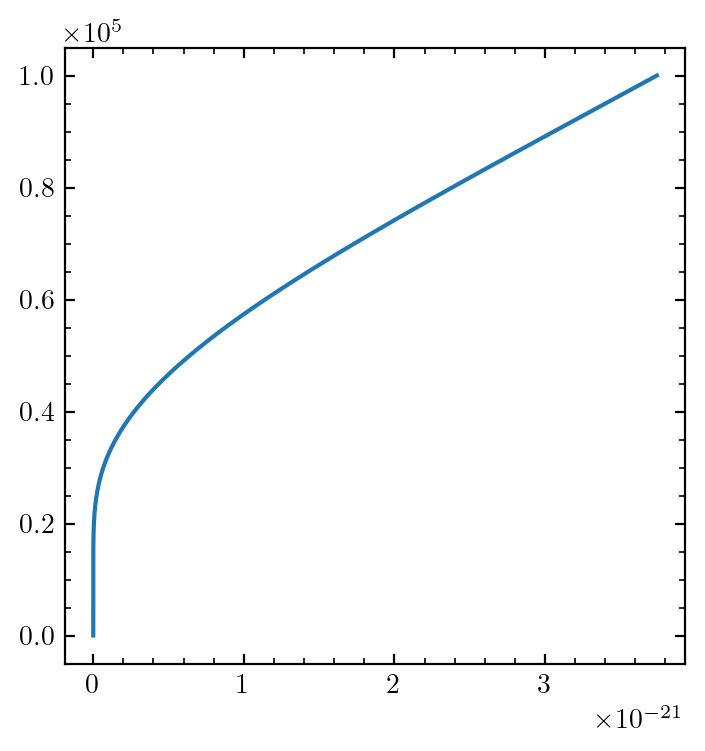

In [ ]:

xe = 0.9
a =H_only_network.heat.replace(sp.symbols("n_H"),xe).replace(sp.symbols("n_H+"),1-xe).replace(sp.symbols("n_e-"),1-xe)

Tgrid = np.logspace(1,5,10**3)
#np.interp(0, [float(a.replace(sp.symbols("T"),t)) for t in Tgrid], Tgrid)
#plt.plot([float(a.replace(sp.symbols("T"),t)) for t in Tgrid], Tgrid)
#sp.lambdify(a, sp.symbols("T"))

In [19]:
sp.lambdify(GasPhaseRecombination("H+").heat.replace(sp.symbols("n_H"),0).replace(sp.symbols("n_H+"),1).replace(sp.symbols("n_e-"),1),sp.symbols("T"))
#from pism.processes import GasPhaseRecombination, CollisionalIonization
#import sympy as sp 
#GasPhaseRecombination().network["e-"].subs(sp.symbols("n_e-"), sp.symbols("n_H+") + sp.symbols("n_He+") + 2*sp.symbols("n_He++"))

SyntaxError: invalid syntax (<lambdifygenerated-4>, line 1)

In [28]:
network = GasPhaseRecombination("H+") + CollisionalIonization("H")

network.network["e-"].replace(sp.symbols("n_e-"),sp.symbols("n_H+")).replace(sp.symbols("n_H"), sp.symbols("n_Htot")-sp.symbols("n_H+"))

# system = list(network.network.values()) + [sp.symbols("n_e-") - sp.symbols("n_H+")] + [sp.symbols("n_H+") + sp.symbols("n_H") - sp.symbols("n_Htot")]



-3.34410023264938e-10*n_H+**2/(T**0.7*(6.30957344480194e-5*T**0.7 + 1)) + 5.85e-11*sqrt(T)*n_H+*(-n_H+ + n_Htot)*exp(-157809.1/T)/(sqrt(10)*sqrt(T)/1000 + 1)

In [15]:

LineCoolingProcess('H','e-').heat_rate_coefficient

NameError: name 'LineCoolingProcess' is not defined

In [ ]:
lambdify('T',LineCoolingProcess('He+','e-').heat_rate_coefficient)

<function _lambdifygenerated(T)>

In [ ]:
lambdify('T',LineCoolingProcess('H','e-').heat_rate_coefficient)(np.logspace(2,8,1000))